In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.linalg import cho_solve
from pyDOE import lhs
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

In [4]:
# Define parameter range and theta values
shift = np.linspace(-2, 2, 100)
thetas = np.array([0.1, 0.5, 1, 5, 10])

# Calculate correlation under various theta values
# A one-dimensional Gaussian kernel K(x_i, y_i)= exp[-theta*(x_i-x_j)^2]
corrs = [np.exp(-theta*(shift**2)) for theta in thetas]

# print(len(corrs))
# print(type(corrs[0]))
# print(corrs[0].shape[0])

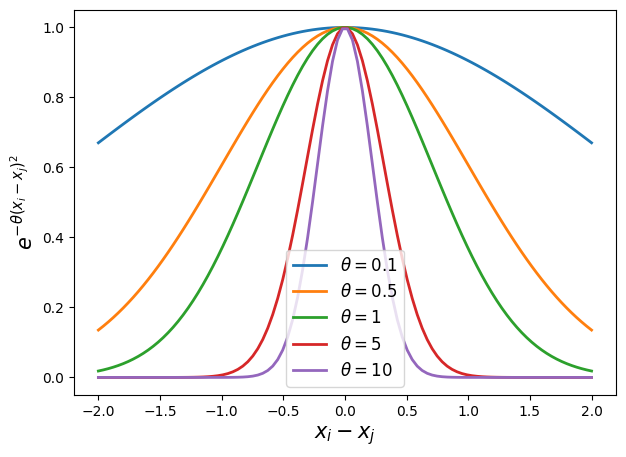

In [5]:
# Visualize results
fig, ax = plt.subplots(figsize=(7,5))

# Define labels
labels = [r'$\theta=0.1$', r'$\theta=0.5$', r'$\theta=1$', r'$\theta=5$', r'$\theta=10$']

for i in range(thetas.shape[0]):
    ax.plot(shift, corrs[i], '-', label=labels[i], lw=2)
ax.legend(fontsize=12)
ax.set_xlabel(r'$x_i-x_j$', fontsize=15)
ax.set_ylabel(r'$e^{-\theta (x_i-x_j)^2}$', fontsize=15);
plt.savefig('./images/Correlation_strength')

In [ ]:
class GaussianProcess:
    """A Gaussian Process class for creating and exploiting a Gaussian Process model."""

    def __init__(self, optimizer, n_restarts_optimizer):
        """Initialize a Gaussian Process model.
            Input:
            optimizer: the optimiztion algorithm;
            n_restarts_optimizer: the number of restarts of the optimizer."""
        self.optimizer = optimizer
        self.n_restarts_optimizer = n_restarts_optimizer
    
    def corr_matrix(self, X1, X2):
        """Compute correlation matrix of two feature matrices X1 and X2.
            Input:
            X1, X2: two feature matrices, 2D arrays (n_samples, n_features).
            Output:
            K: the correlation matrix."""
        return